### Case Study #2

priyankamohanrao.nigade@pace.edu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Loading the data into Data Frame

customer_order_df = pd.read_csv('casestudy.csv', index_col=False)
print(customer_order_df.shape)
customer_order_df.head()

(685927, 4)


,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [3]:
customer_order_df.drop('Unnamed: 0', axis=1, inplace=True)


There is 1 dataset(csv) with 3 years worth of customer orders. There are 4 columns in the csv dataset: <br>
index, CUSTOMER_EMAIL(unique identifier as hash), Net_Revenue, and Year. <br>
For each year we need the following information:


### Total revenue for the current year

In [4]:
# As there is no data for current year 2022 
# so I took most recennt year from dataset as current year to calculate the total revenue 
num_of_recent_year_records = len(customer_order_df[customer_order_df['year'] == max(customer_order_df['year'])]['net_revenue'])
print(f'We have {num_of_recent_year_records} records for resent year {max(customer_order_df["year"])}')


total_revenue = customer_order_df[customer_order_df['year'] == max(customer_order_df['year'])]['net_revenue'].sum()
print(f'\nTotal Revenue for year {max(customer_order_df["year"])}: {total_revenue}')



We have 249987 records for resent year 2017

Total Revenue for year 2017: 31417495.030000016


In [37]:
# total revenue per year
print(f'\n Total Revenues per year: \n')
print(customer_order_df.groupby('year')['net_revenue'].sum())



 Total Revenues per year: 

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64


### New Customer Revenue e.g. new customers not present in previous year only

In [6]:
unique_years = customer_order_df['year'].unique()
new_customers_revenue = {}

for i in range(customer_order_df['year'].nunique()):
    new_customers_revenue[unique_years[i]] = 0
    
for i in range(customer_order_df['year'].nunique()):
    #print(unique_years[i])
    #skip for first year as all will be new customers
    if i == 0:
        revenue = customer_order_df[customer_order_df['year'] == unique_years[i]]['net_revenue'].sum()
        print(f"Year {unique_years[i]} New Customer Revenue: {revenue}")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='left')
        # print(merged_df)
        # net_revenue_x represents a current year new customers which not present in previous year
        revenue = merged_df[merged_df['year_y'].isnull() == True]['net_revenue_x'].sum()
        print(f"Year {unique_years[i]} New Customer Revenue: {revenue}")
        #print(merged_df[merged_df['year_y'].isnull() == True]['net_revenue_x'].sum())
        

Year 2015 New Customer Revenue: 29036749.189999994
Year 2016 New Customer Revenue: 18245491.01
Year 2017 New Customer Revenue: 28776235.039999995


### Existing Customer Growth 
To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [7]:
unique_years = customer_order_df['year'].unique()

for i in range(customer_order_df['year'].nunique()):
    #skip for first year as all will be new customers
    if i == 0:
        revenue = customer_order_df[customer_order_df['year'] == unique_years[i]]['net_revenue'].sum()
        print(f"Existing Customer Growth for Year {unique_years[i]} : {revenue}")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='inner')
        # print(merged_df)
        # net_revenue_x represents a current year and net_revenue_y for previous year revenue for each existing customer
        revenue = (merged_df[merged_df['year_y'].isnull() == False]['net_revenue_x'] - 
                        merged_df[merged_df['year_y'].isnull() == False]['net_revenue_y']).sum()
        print(f"Existing Customer Growth for Year {unique_years[i]} : {revenue}")
        

Existing Customer Growth for Year 2015 : 29036749.189999994
Existing Customer Growth for Year 2016 : 20335.459999999985
Existing Customer Growth for Year 2017 : 20611.340000000004


### Revenue lost from attrition
https://smallbusiness.chron.com/calculate-revenue-attrition-79349.html
Formula:
The formula for revenue attrition is beginning period reoccurring revenue minus end-of-period reoccurring revenue, less any new revenue gained, divided by beginning period revenue.

In [8]:
# Not sure which factor is affecting the attrition, 
# might need more information in the dataset to calculate Revenue lost from attrition

unique_years = customer_order_df['year'].unique()

for i in range(customer_order_df['year'].nunique()):
    #skip for first year as all will be new customers
    if i == 0:
        print(f"No Revenue lost from attrition for Year {unique_years[i]}")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        pre_year_total_revenue = revenue_df_pre_year['net_revenue'].sum()
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
       
        ## get lost customers revenue
        merged_df = revenue_df_pre_year.merge(revenue_df_current_year, on='customer_email', how='left')
        # print(merged_df)
        # net_revenue_x represents a previous year customer revenue 
        # if year_y is null then that customer is not present in current year
        lost_cust_revenue = merged_df[merged_df['year_y'].isnull() == True]['net_revenue_x'].sum()
        
        # get new customers revenue
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='left')
        # print(merged_df)
        # net_revenue_x represents a current year new customers which not present in previous year
        new_cust_revenue = merged_df[merged_df['year_y'].isnull() == True]['net_revenue_x'].sum()
        revenue_attrition = round(((lost_cust_revenue - new_cust_revenue)/pre_year_total_revenue)* 100,2)
        print(f"Revenue lost from attrition for Year {unique_years[i]} : {revenue_attrition}%")
        


No Revenue lost from attrition for Year 2015
Revenue lost from attrition for Year 2016 : 11.45%
Revenue lost from attrition for Year 2017 : -22.02%


### Existing Customer Revenue Current Year

In [9]:
unique_years = customer_order_df['year'].unique()

for i in range(customer_order_df['year'].nunique()):
    #skip for first year as all will be new customers
    if i == 0:
        revenue = customer_order_df[customer_order_df['year'] == unique_years[i]]['net_revenue'].sum()
        print(f"Existing Customer Revenue for Year {unique_years[i]} : {revenue}")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='inner')
        # print(merged_df)
        # net_revenue_x represents a current year revenue for each existing customer
        revenue = (merged_df[merged_df['year_y'].isnull() == False]['net_revenue_x']).sum()
        print(f"Existing Customer Revenue for Year {unique_years[i]} : {revenue}")
        

Existing Customer Revenue for Year 2015 : 29036749.189999994
Existing Customer Revenue for Year 2016 : 7485452.58
Existing Customer Revenue for Year 2017 : 2641259.99


### Existing Customer Revenue Prior Year

In [10]:
unique_years = customer_order_df['year'].unique()

for i in range(customer_order_df['year'].nunique()):
    #skip for first year as all will be new customers
    if i == 0:
        print(f"Existing Customer Revenue for Prior Year {unique_years[i]-1} : 0")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='inner')
        # print(merged_df)
        # net_revenue_y represents a previous year revenue for each existing customer
        revenue = (merged_df[merged_df['year_y'].isnull() == False]['net_revenue_y']).sum()
        print(f"Existing Customer Revenue for Prior Year {unique_years[i-1]} : {revenue}")
        

Existing Customer Revenue for Prior Year 2014 : 0
Existing Customer Revenue for Prior Year 2015 : 7465117.12
Existing Customer Revenue for Prior Year 2016 : 2620648.65


### Total Customers Current Year
### Total Customers Previous Year

In [11]:
print(f'\n Total Customers per year: \n')
print(customer_order_df[['customer_email', 'year']].groupby('year').count())


 Total Customers per year: 

      customer_email
year                
2015          231294
2016          204646
2017          249987


### New Customers

In [12]:
unique_years = customer_order_df['year'].unique()
    
for i in range(customer_order_df['year'].nunique()):
    #print(unique_years[i])
    #skip for first year as all will be new customers
    if i == 0:
        customers = customer_order_df[customer_order_df['year'] == unique_years[i]]['customer_email'].count()
        print(f"New Customers in Year {unique_years[i]}: {customers}")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_current_year.merge(revenue_df_pre_year, on='customer_email', how='left')
        # print(merged_df)
        # net_revenue_x represents a current year new customers which not present in previous year
        customers = merged_df[merged_df['year_y'].isnull() == True]['customer_email'].count()
        print(f"New Customers in Year {unique_years[i]}: {customers}")
        

New Customers in Year 2015: 231294
New Customers in Year 2016: 145062
New Customers in Year 2017: 229028


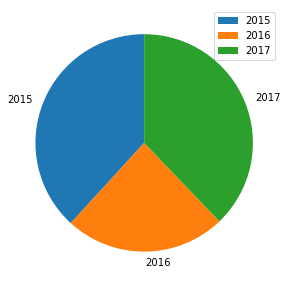

In [67]:
# Pie chart for the new customers per year
plt.figure(figsize=(7, 5))
years=['2015', '2016', '2017']
new_customer_count= [231294, 145062, 229028]
plt.pie(new_customer_count, labels = years, startangle = 90)
plt.legend()
plt.show() 


### Lost Customers

In [13]:
unique_years = customer_order_df['year'].unique()
    
for i in range(customer_order_df['year'].nunique()):
    #print(unique_years[i])
    #skip for first year as all will be new customers
    if i == 0:
        print(f"Lost Customers in Year {unique_years[i]}: 0")
    else:
        # Previous year
        revenue_df_pre_year = customer_order_df[customer_order_df['year'] == unique_years[i-1]]
        # Current year
        revenue_df_current_year = customer_order_df[customer_order_df['year'] == unique_years[i]]
        merged_df = revenue_df_pre_year.merge(revenue_df_current_year, on='customer_email', how='left')
        # print(merged_df)
        # if year_y is null then that customer is not present in current year
        customers = merged_df[merged_df['year_y'].isnull() == True]['customer_email'].count()
        print(f"Lost Customers in Year {unique_years[i]}: {customers}")
        

Lost Customers in Year 2015: 0
Lost Customers in Year 2016: 171710
Lost Customers in Year 2017: 183687


In [14]:
# to get lost customers for current we might have used this technique too
# Previous year Customers - (Total current year Customers - New current year customers)
# e.g for year 2017 this would have become
# 204646 - (249987 - 229028) = 183687

Additionally, generate a few unique plots highlighting some information from the dataset. Are there any interesting observations?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='net_revenue', ylabel='Density'>

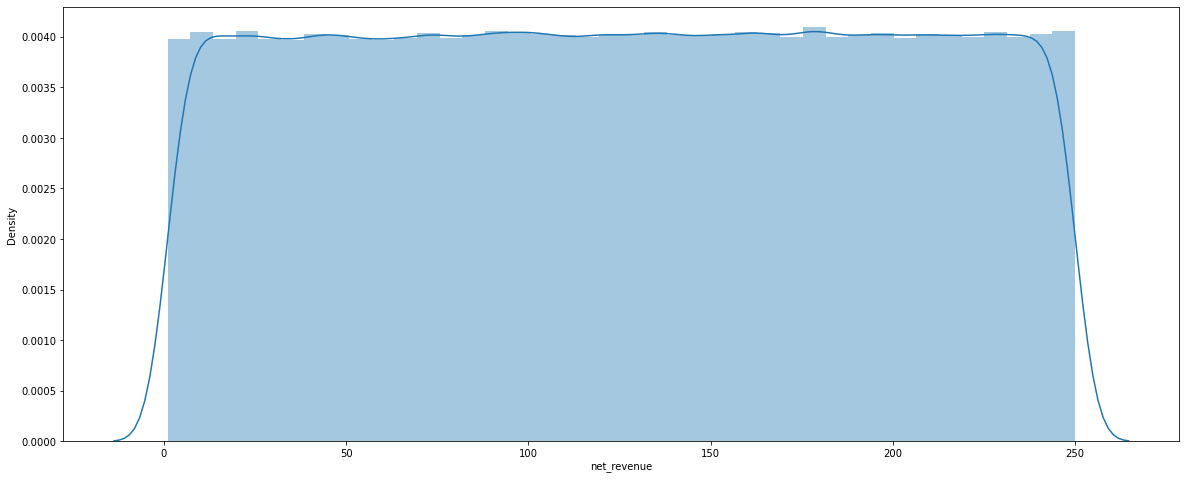

In [15]:
# Density plot of net revenue

plt.figure(figsize=(20, 8))
sns.distplot(customer_order_df['net_revenue'],bins=40)

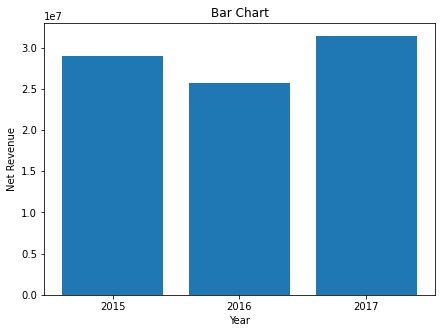

In [64]:
plt.figure(figsize=(7, 5))
years=['2015', '2016', '2017']
total_net_revenue= [29036749.19, 25730943.59, 31417495.03]

# Bar chart with Year against Net Revenue
plt.bar(years, total_net_revenue)
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('Net Revenue')
  
# Adding the legends
plt.show()



#### Interesting observations

<li> Too many new customers added and lost in year 2017.
<li> Existing Customer Growth for Year 2016 and Year 2017 is almost same (20335 & 20611)
<li> There is a big difference in between New Customer Revenue in Year 2016: 18245491.01 and New Customer Revenue Year 2017: 28776235.039999995

### Thank you!